## Verzeo ML Major Project Submission
### Made by Kartikey Sharma (IIT Goa)

### GOAL 
Predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

#### FEATURES:
<b>Name</b>: The brand and model of the car.<br>
<b>Location</b>: The location in which the car is being sold or is available for purchase.<br>
<b>Year</b>: The year or edition of the model.<br>
<b>Kilometers_Driven</b>: The total kilometres driven in the car by the previous owner(s) in KM.<br>
<b>Fuel_Type</b>: The type of fuel used by the car.<br>
<b>Transmission</b>: The type of transmission used by the car.<br>
<b>Owner_Type</b>: Whether the ownership is Firsthand, Second hand or other.<br>
<b>Mileage</b>: The standard mileage offered by the car company in kmpl or km/kg.<br>
<b>Engine</b>: The displacement volume of the engine in cc.<br>
<b>Power</b>: The maximum power of the engine in bhp.<br>
<b>Seats</b>: The number of seats in the car.<br>
<b>Price</b>: The price of the used car in INR Lakhs.<br>


### Process
Clean the data (missing values and categorical variables).'.
<br>Build the model and check the MAE.
<br>Try to improve the model.
<br>Brand matters too! I could select the brand name of the car and treat them as categorical data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
#Importing datasets
df_train = pd.read_excel("Data_Train.xlsx")
df_test = pd.read_excel("Data_Test.xlsx")
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [3]:
df_train.shape

(6019, 12)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [5]:
#No of duplicated values in the train set
df_train.duplicated().sum()

0

In [6]:
#Seeing the number of duplicated values
df_test.duplicated().sum()

1

In [7]:
#Number of null values

df_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
df_train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [9]:
df_train['Name'] = df_train.Name.str.split().str.get(0)
df_test['Name'] = df_test.Name.str.split().str.get(0)
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [10]:
# all rows have been modified
df_train['Name'].value_counts().sum()

6019

### Missing Values

In [11]:
# Get names of columns with missing values
cols_with_missing = [col for col in df_train.columns
                     if df_train[col].isnull().any()]
print("Columns with missing values:")
print(cols_with_missing)

Columns with missing values:
['Mileage', 'Engine', 'Power', 'Seats']


In [12]:
df_train['Seats'].fillna(df_train['Seats'].mean(),inplace=True)
df_test['Seats'].fillna(df_test['Seats'].mean(),inplace=True)

In [13]:
# for more accurate predicitions
data = pd.concat([df_train,df_test], sort=False)

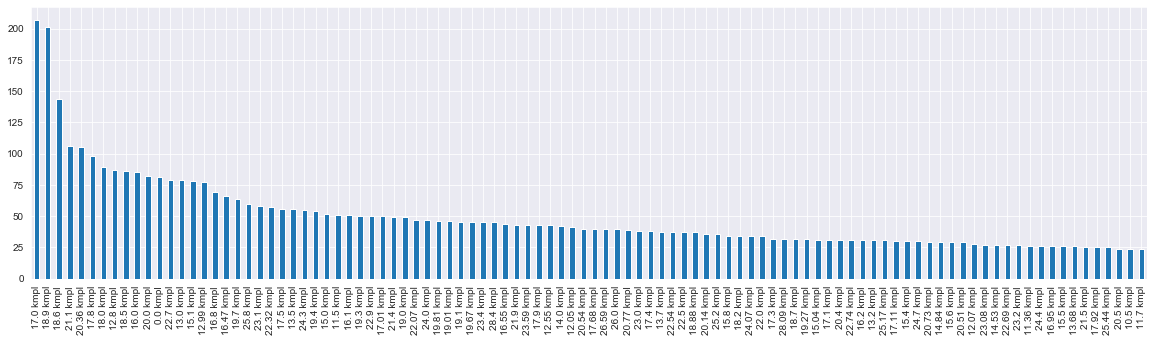

In [14]:
plt.figure(figsize=(20,5))
data['Mileage'].value_counts().head(100).plot.bar()
plt.show()

In [15]:
df_train['Mileage'] = df_train['Mileage'].fillna('17.0 kmpl')
df_test['Mileage'] = df_test['Mileage'].fillna('17.0 kmpl')
# o(zero) and null are both missing values clearly
df_train['Mileage'] = df_train['Mileage'].replace("0.0 kmpl", "17.0 kmpl")
df_test['Mileage'] = df_test['Mileage'].replace("0.0 kmpl", "17.0 kmpl")

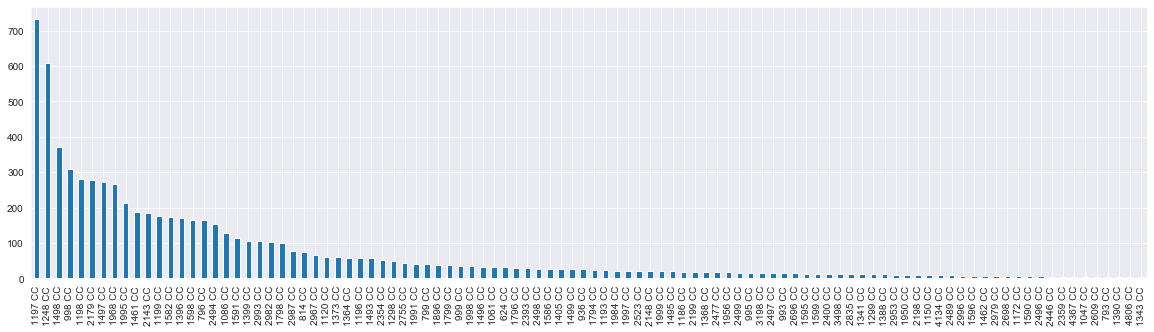

In [16]:
plt.figure(figsize=(20,5))
data['Engine'].value_counts().head(100).plot.bar()
plt.show()

In [17]:
df_train['Engine'] = df_train['Engine'].fillna('1000 CC')
df_test['Engine'] = df_test['Engine'].fillna('1000 CC')

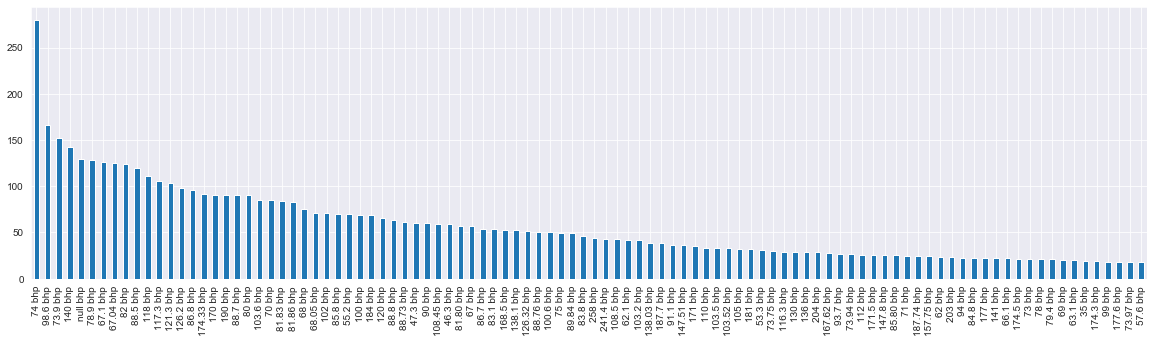

In [18]:
plt.figure(figsize=(20,5))
data['Power'].value_counts().head(100).plot.bar()
plt.show()

In [19]:
df_train['Power'] = df_train['Power'].fillna('74 bhp')
df_test['Power'] = df_test['Power'].fillna('74 bhp')
#null bhp created a problem during LabelEncoding
df_train['Power'] = df_train['Power'].replace("null bhp", "74 bhp")
df_test['Power'] = df_test['Power'].replace("null bhp", "74 bhp")

In [20]:
# Method to extract 'float' from 'object' 
import re
def get_number(name):
    title_search = re.search('([\d+\.+\d]+\W)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [21]:
df_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   object 
 8   Engine             6019 non-null   object 
 9   Power              6019 non-null   object 
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [23]:
#Acquring float values and isolating them
df_train['Mileage'] = df_train['Mileage'].apply(get_number).astype('float')
df_train['Engine'] = df_train['Engine'].apply(get_number).astype('int')
df_train['Power'] = df_train['Power'].apply(get_number).astype('float')

df_test['Mileage'] = df_test['Mileage'].apply(get_number).astype('float')
df_test['Engine'] = df_test['Engine'].apply(get_number).astype('int')
df_test['Power'] = df_test['Power'].apply(get_number).astype('float')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   int32  
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 540.9+ KB


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   int32  
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 101.4+ KB


In [25]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


### Categorical Variables

In [26]:
from sklearn.model_selection import train_test_split

y = np.log1p(df_train.Price)  # Made a HUGE difference. MAE went down highly
X = df_train.drop(['Price'],axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.82,test_size=0.18,random_state=0)


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X_train['Name'] = label_encoder.fit_transform(X_train['Name'])
X_valid['Name'] = label_encoder.transform(X_valid['Name'])
df_test['Name'] = label_encoder.fit_transform(df_test['Name'])

X_train['Location'] = label_encoder.fit_transform(X_train['Location'])
X_valid['Location'] = label_encoder.transform(X_valid['Location'])
df_test['Location'] = label_encoder.fit_transform(df_test['Location'])

X_train['Fuel_Type'] = label_encoder.fit_transform(X_train['Fuel_Type'])
X_valid['Fuel_Type'] = label_encoder.transform(X_valid['Fuel_Type'])
df_test['Fuel_Type'] = label_encoder.fit_transform(df_test['Fuel_Type'])

X_train['Transmission'] = label_encoder.fit_transform(X_train['Transmission'])
X_valid['Transmission'] = label_encoder.transform(X_valid['Transmission'])
df_test['Transmission'] = label_encoder.fit_transform(df_test['Transmission'])

X_train['Owner_Type'] = label_encoder.fit_transform(X_train['Owner_Type'])
X_valid['Owner_Type'] = label_encoder.transform(X_valid['Owner_Type'])
df_test['Owner_Type'] = label_encoder.fit_transform(df_test['Owner_Type'])

In [28]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
2058,24,7,2015,75863,1,1,0,19.01,1461,108.45,5.0
898,9,4,2010,43000,4,1,2,16.80,1497,116.30,5.0
2624,10,7,2015,66337,1,1,0,24.00,1120,70.00,5.0
794,10,9,2018,19500,4,1,0,18.60,1197,81.83,5.0
2141,27,2,2016,78000,1,1,2,25.00,1396,69.01,5.0


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935 entries, 2058 to 2732
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4935 non-null   int32  
 1   Location           4935 non-null   int32  
 2   Year               4935 non-null   int64  
 3   Kilometers_Driven  4935 non-null   int64  
 4   Fuel_Type          4935 non-null   int32  
 5   Transmission       4935 non-null   int32  
 6   Owner_Type         4935 non-null   int32  
 7   Mileage            4935 non-null   float64
 8   Engine             4935 non-null   int32  
 9   Power              4935 non-null   float64
 10  Seats              4935 non-null   float64
dtypes: float64(3), int32(6), int64(2)
memory usage: 347.0 KB


## Model

In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
from math import sqrt

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

predictions = my_model.predict(X_valid)
print("MAE: " + str(mean_absolute_error(predictions, y_valid)))
print("MSE: " + str(mean_squared_error(predictions, y_valid)))
print("MSLE: " + str(mean_squared_log_error(predictions, y_valid)))

print("RMSE: "+ str(sqrt(mean_squared_error(predictions, y_valid))))

MAE: 0.10643605651544133
MSE: 0.027429293987309863
MSLE: 0.0030055833644411435
RMSE: 0.16561791565923617


## Prediciting on Test

In [31]:
preds_test = my_model.predict(df_test)
preds_test = np.exp(preds_test)-1 #converting target to original state
print(preds_test)

# The Price is in the format xx.xx So let's round off and submit.

preds_test = preds_test.round(5)
print(preds_test)

[ 3.440185   3.140221  14.026105  ...  3.0297828  3.2455106 15.280251 ]
[ 3.44018  3.14022 14.0261  ...  3.02978  3.24551 15.28025]


In [32]:
output = pd.DataFrame({'Price': preds_test})
output.to_excel('Output.xlsx', index=False)

#### NOTE

Treating 'Mileage' and the others as categorical variables was a mistake. Eg.: Mileage went up from 23.6 to around 338! Converting it to numbers fixed it.
LabelEncoder won't work if there are missing values.
ValueError: y contains previously unseen label 'Bentley'. Fixed it by increasing training_size in train_test_split.
Scaling all the columns made the model worse (as expected).

==============================================End of Project======================================================

In [33]:
# Code by Kartikey Sharma
# Veni.Vidi.Vici.